# Decision Tree

A **Decision Tree** is a supervised learning algorithm used for both classification and regression tasks. It works by recursively splitting the dataset into subsets based on the feature that provides the maximum information gain or the least impurity. The goal is to create a model that predicts the target variable by learning decision rules from the features.

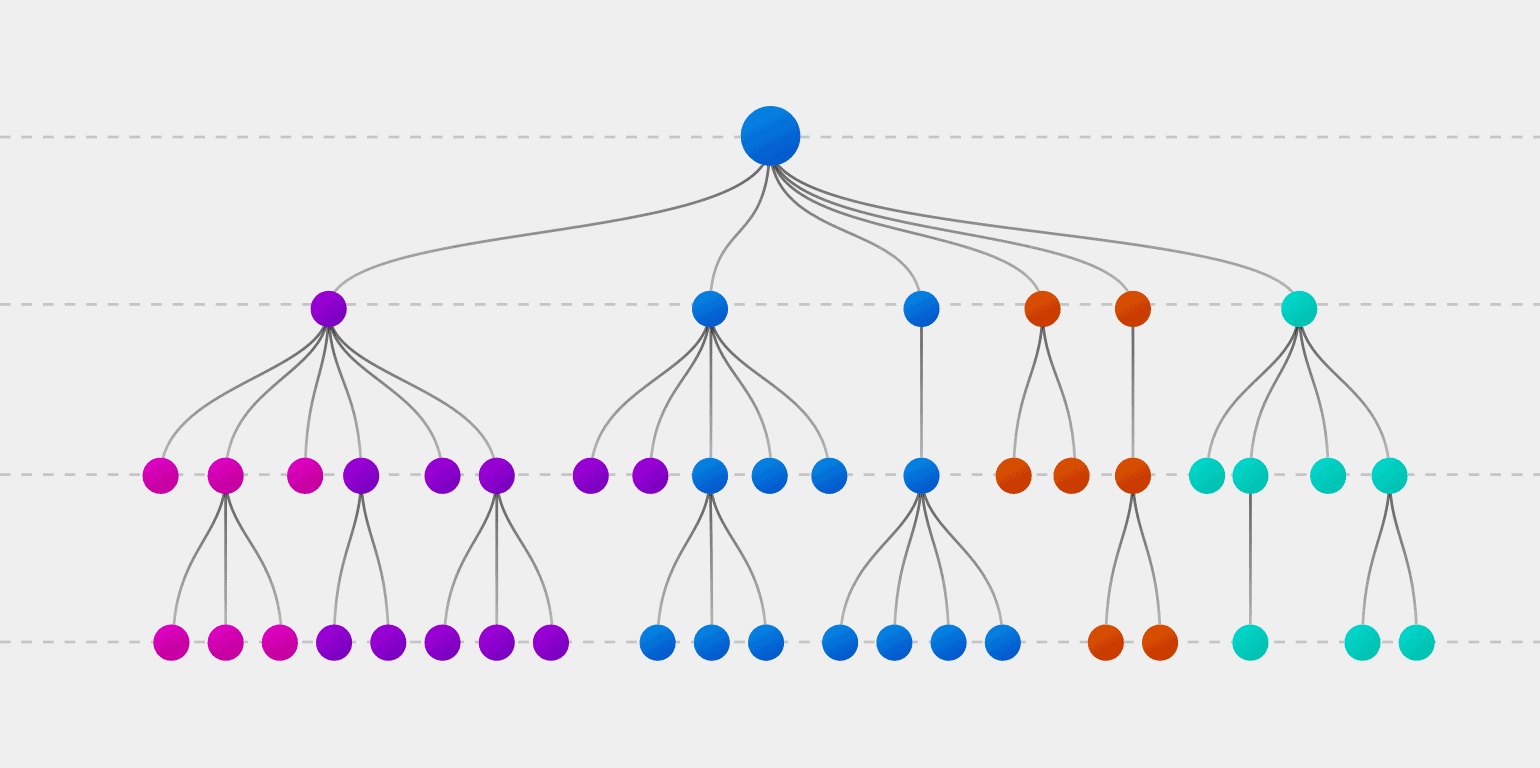

### **Key Concepts**:
- **Root Node**: The topmost node in the tree, representing the entire dataset, which is split into subsets.
- **Decision Nodes**: Nodes that split the data further based on certain conditions.
- **Leaf Nodes (Terminal Nodes)**: Nodes that represent the final output or decision; no further splitting occurs here.
- **Splitting**: The process of dividing a node into two or more sub-nodes.
- **Pruning**: The process of removing nodes to prevent overfitting and improve generalization.

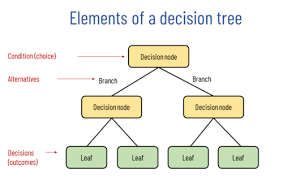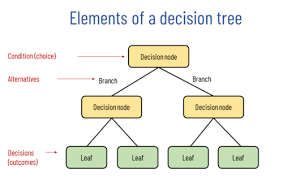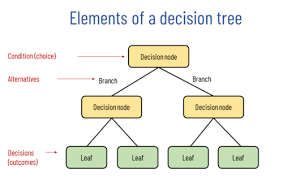

### **Parameters in a Decision Tree**

**Criterion**:
* **Purpose**: Determines the function used to measure the quality of a split.
* **Common Values**: 
     * `"gini"` for the Gini impurity (default in `sklearn`).
     * `"entropy"` for Information Gain.
* **Selection**: 
     - Use `"gini"` for a faster, less computationally expensive tree.
     - Use `"entropy"` if you prefer a model that's slightly more precise but computationally heavier.

**Max Depth (`max_depth`)**:
   - **Purpose**: Limits the maximum depth of the tree, which is the length of the longest path from the root to a leaf.
   - **Selection**: 
     - A small `max_depth` prevents the model from overfitting but may underfit the data.
     - Start with a larger value and decrease it until you find a balance between bias and variance (i.e., performance on both training and validation datasets).

**Min Samples Split (`min_samples_split`)**:
   - **Purpose**: The minimum number of samples required to split an internal node.
   - **Selection**:
     - Higher values prevent splitting too deep into the tree, reducing overfitting.
     - Start with the default value (2) and increase if the tree is too deep or overfitting.

**Min Samples Leaf (`min_samples_leaf`)**:
   - **Purpose**: The minimum number of samples that should be present in a leaf node.
   - **Selection**:
     - A higher value ensures that leaf nodes are large enough to reduce overfitting.
     - Test different values, especially if your dataset is large.

**Max Features (`max_features`)**:
   - **Purpose**: The maximum number of features to consider when looking for the best split.
   - **Selection**:
     - For classification tasks, using `sqrt(number_of_features)` is common.
     - For regression tasks, using `number_of_features / 3` is common.
     - Test different values to optimize performance.

**Max Leaf Nodes (`max_leaf_nodes`)**:
   - **Purpose**: Limits the number of leaf nodes in the tree.
   - **Selection**:
     - Useful for controlling the tree size and overfitting.
     - If you find the tree has too many leaves, limiting this parameter can help.

**Min Impurity Decrease (`min_impurity_decrease`)**:
   - **Purpose**: A node will be split if this split induces a decrease in impurity greater than or equal to this value.
   - **Selection**:
     - This is often used for fine-tuning, especially in very noisy datasets.

### **Example FlowChart**
    
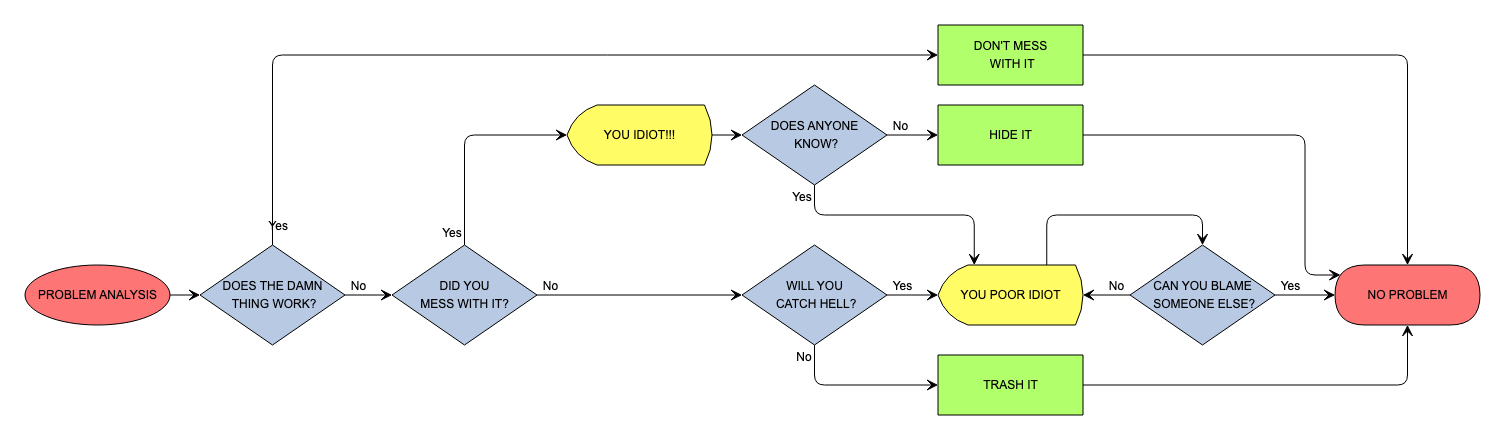

### **Selecting the Ideal Values for Parameters**

1. **Grid Search**: This is a methodical approach to tuning parameters. You define a set of possible values for each parameter and systematically try every combination. This will give you the best combination of parameters based on cross-validation.

2. **Randomized Search**: Instead of testing every possible combination, you sample a fixed number of parameter settings from the specified ranges. It's faster and still effective.

3. **Cross-Validation**: Always use cross-validation to evaluate the performance of your Decision Tree with different parameters to ensure that your model generalizes well.

4. **Learning Curves and Validation Curves**: These can be helpful in understanding how changes in `max_depth`, `min_samples_leaf`, etc., impact the performance of the model. They help identify overfitting or underfitting.

# Import Basic Libraries

In [6]:
import pandas as pd
pd.set_option('display.max_columns',None)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')
import seaborn as sns

In [8]:
import warnings
warnings.filterwarnings('ignore')

# Reading and Describing the Data

Dataset Link - https://www.kaggle.com/datasets/umerrtx/machine-failure-prediction-using-sensor-data

In [10]:
df = pd.read_csv('Mchine_Failure.csv')

In [12]:
df.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [14]:
df.shape

(944, 10)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


* **`footfall`**: This likely measures the number of people (or objects) passing through a certain area. In a machine failure context, it might be related to the operational environment or the load on the machine.

* **`tempMode`**: This could indicate the temperature mode the machine is operating in, such as cooling, heating, or normal mode.

* **`AQ (Air Quality)`**: This likely measures the quality of the air around the machine. Poor air quality could lead to machine failure due to dust, particles, or gases affecting the machine's sensors or internal components.

* **`USS (Ultrasonic Sensor Data)`**: This likely represents data from an ultrasonic sensor, which could be used to detect distance, object presence, or even fluid levels in certain applications.

* **`CS (Current Sensor)`**: This could measure the electrical current being drawn by the machine. Abnormal current values might indicate issues like overloads, short circuits, or other electrical problems.

* **`VOC (Volatile Organic Compounds)`**: VOCs are chemicals that can be emitted as gases from certain solids or liquids. High VOC levels might indicate harmful emissions or leaks within the machine, potentially leading to failure.

* **`RP (Rotational Position)`**: This might refer to the rotational position of a specific part within the machine, like a motor or a fan. If the rotational position is off, it could lead to mechanical failures.

* **`IP (Input Power)`**: This likely represents the power input to the machine. Fluctuations in input power could cause or signal machine malfunctions.

* **`Temperature`**: This column likely measures the temperature within the machine or in its operating environment. High or fluctuating temperatures could be indicators of potential machine failure.

* **`fail`**: This is likely the target variable that indicates whether the machine has failed (1) or not (0).


In [18]:
df.describe()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


# Data Exploration and Preprocessing

Numerical Columns in data are :  ['footfall', 'tempMode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP', 'Temperature', 'fail']


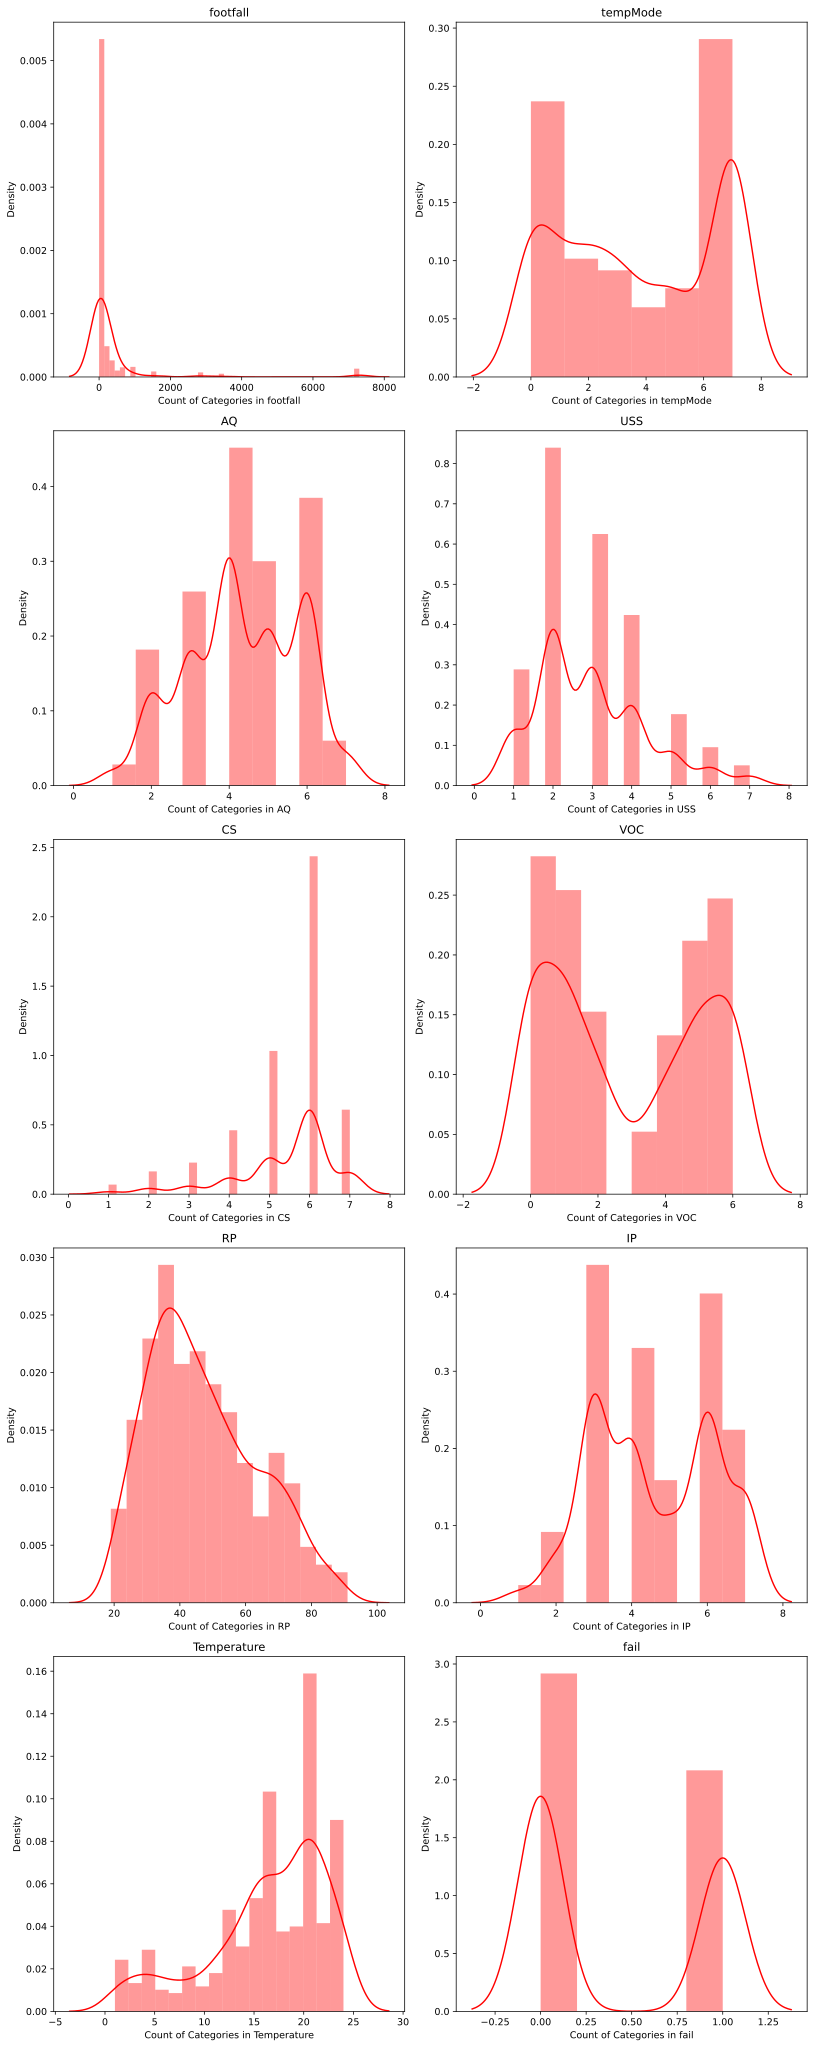

In [20]:
Numerical_Columns = [i for i in df.columns if df[i].dtype != 'object']
print("Numerical Columns in data are : ",Numerical_Columns)

num_cols = 2
num_rows = int(np.ceil(len(Numerical_Columns) / num_cols))  


fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))
axes = axes.flatten()

for i, col in enumerate(Numerical_Columns):
    sns.distplot(df, x=df[col], color='red', ax=axes[i])
    axes[i].set_xlabel(f'Count of Categories in {col}')
    axes[i].set_ylabel('Density')
    axes[i].set_title(f'{col}')
    axes[i].tick_params(axis='x', rotation=0)  

for j in range(len(Numerical_Columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [21]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mS = MinMaxScaler()
sC = StandardScaler()

In [24]:
df.columns

Index(['footfall', 'tempMode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP',
       'Temperature', 'fail'],
      dtype='object')

#### Feature Scaling

In [26]:
df['tempMode'] = mS.fit_transform(df['tempMode'].values.reshape(-1, 1)).flatten()
df['AQ'] = mS.fit_transform(df['AQ'].values.reshape(-1,1)).flatten()
df['USS'] = mS.fit_transform(df['USS'].values.reshape(-1,1)).flatten()
df['CS'] = mS.fit_transform(df['CS'].values.reshape(-1,1)).flatten()
df['VOC'] = mS.fit_transform(df['VOC'].values.reshape(-1,1)).flatten()
df['IP'] = mS.fit_transform(df['IP'].values.reshape(-1,1)).flatten()

In [28]:
df['footfall'] =  sC.fit_transform(df['footfall'].values.reshape(-1,1)).flatten()
df['RP'] = sC.fit_transform(df['RP'].values.reshape(-1,1)).flatten()
df['Temperature'] = sC.fit_transform(df['Temperature'].values.reshape(-1,1)).flatten()

#### Deifining X and y varaible as independent and dependent variable.

In [34]:
X = df.drop('fail', axis=1)
y = df['fail']

# Model Building

In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [36]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
print(f'Best Parameters: {grid_search.best_params_}')

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [38]:
best_dt = grid_search.best_estimator_
best_dt.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=10,
                       random_state=42)

In [ ]:
y_pred = best_dt.predict(X_test)

Accuracy: 0.8521
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       160
           1       0.84      0.81      0.83       124

    accuracy                           0.85       284
   macro avg       0.85      0.85      0.85       284
weighted avg       0.85      0.85      0.85       284



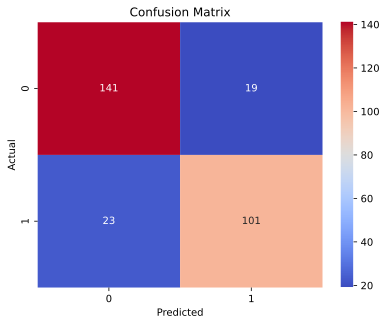

In [105]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

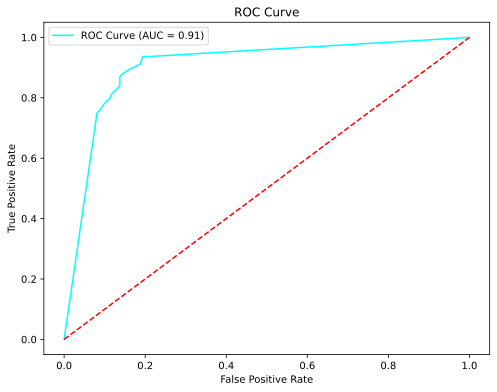

In [155]:
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = best_dt.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})',color = 'cyan')
plt.plot([0, 1], [0, 1], 'k--',color = 'red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

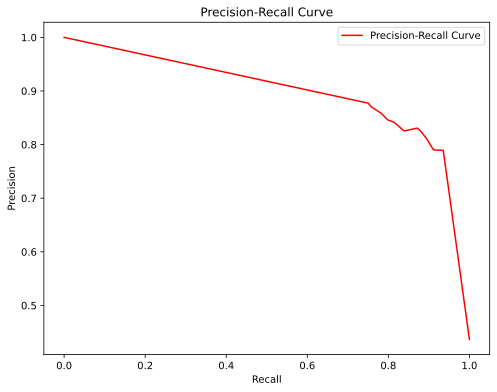

In [159]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve',color = 'red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

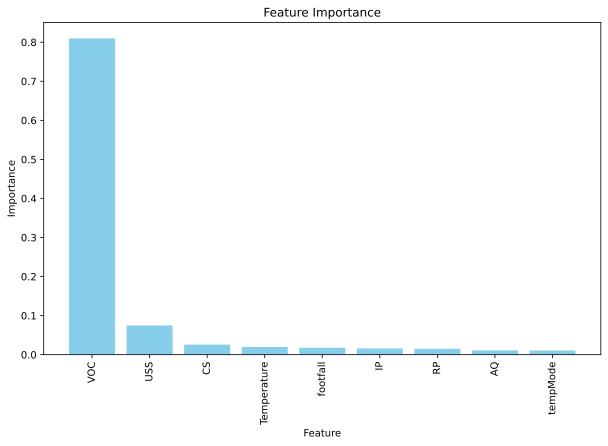

In [173]:
importances = best_dt.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

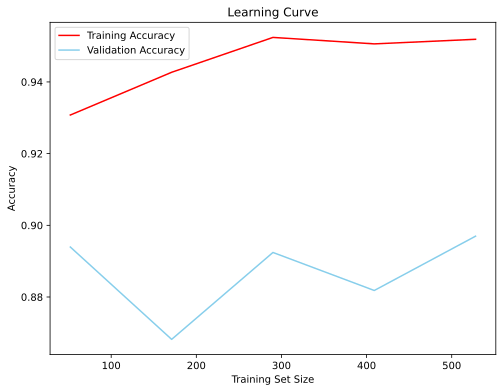

In [179]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(best_dt, X_train, y_train, cv=5, scoring='accuracy')

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy',color = 'red')
plt.plot(train_sizes, val_mean, label='Validation Accuracy', color = 'skyblue')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()

# Model Summary 


| **Metric**        | **Class 0**          | **Class 1**          | **Description**                                                                 |
|-------------------|----------------------|----------------------|---------------------------------------------------------------------------------|
| **Precision**     | 0.86                 | 0.84                 | Proportion of correct positive predictions out of all positive predictions.     |
| **Recall**        | 0.88                 | 0.81                 | Proportion of actual positives correctly identified by the model.               |
| **F1-Score**      | 0.87                 | 0.83                 | Harmonic mean of Precision and Recall, balancing the two.                       |
| **Support**       | 160                  | 124                  | Number of actual instances of each class in the test set.                       |
| **Accuracy**      | \-                   | \-                   | 0.85 overall accuracy; proportion of correctly classified instances.            |
| **Macro Avg**     | 0.85 (Precision, Recall, F1) | 0.85 (Precision, Recall, F1) | Average of metrics across classes, treating each class equally.   |
| **Weighted Avg**  | 0.85 (Precision, Recall, F1) | 0.85 (Precision, Recall, F1) | Average of metrics weighted by class support (class distribution). |

# Visualizing the Decison Tree

In [ ]:
from sklearn.tree import export_graphviz
from graphviz import Source

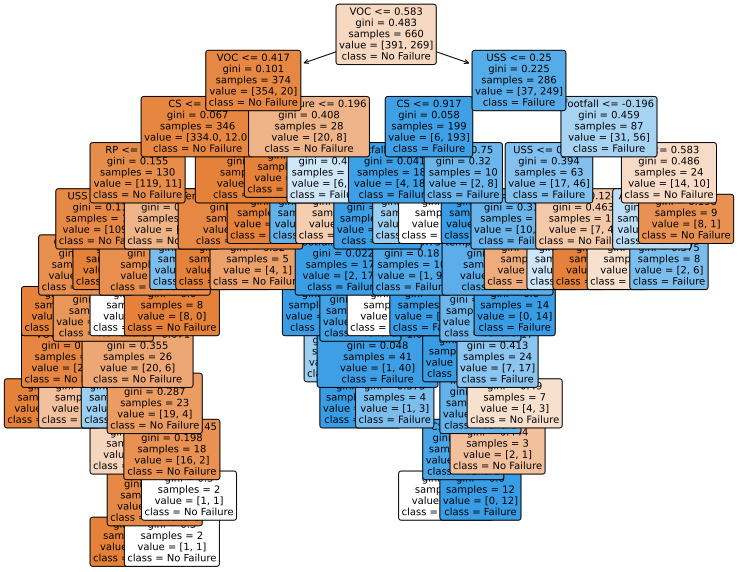

In [139]:
# Set the size of the plot
plt.figure(figsize=(12, 10))

# Plot the tree
plot_tree(best_dt, 
          feature_names=X.columns, 
          class_names=['No Failure', 'Failure'], 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.show()

Dwonload Decision Tree - https://drive.google.com/file/d/1zsRO_8tZSLAtHqFm7hSeU99b0g4v0fvU/view?usp=sharing